In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [20]:
def download_and_unzip(url, folder):
    print(f"Downloading and extracting assests...", end="")

    urlretrieve(url, folder)

    try:
        with ZipFile(folder) as z:
            z.extractall(os.path.split(folder)[0])

        print("done")

    except Exception as e:
        print("\nINvalid file.",e)

URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

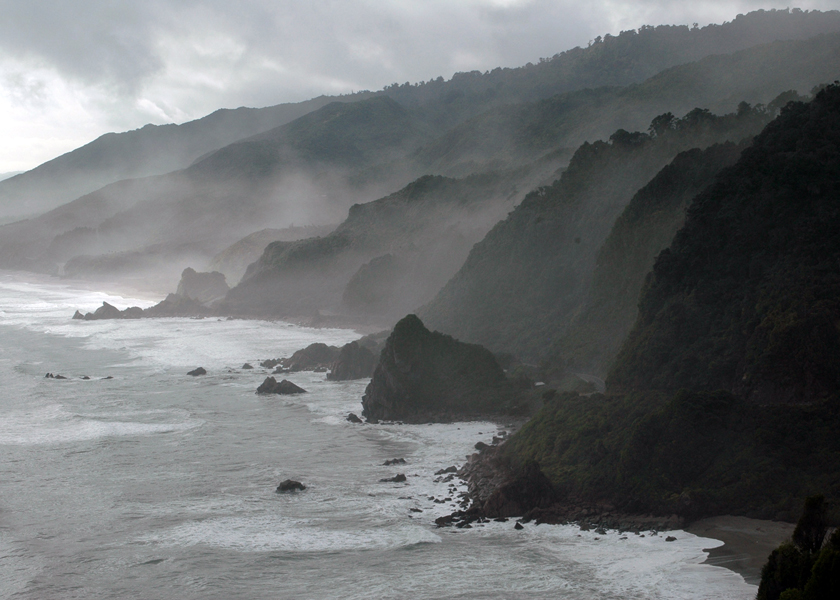

In [21]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
Image(filename="New_Zealand_Coast.jpg")

Addition or Brightness:

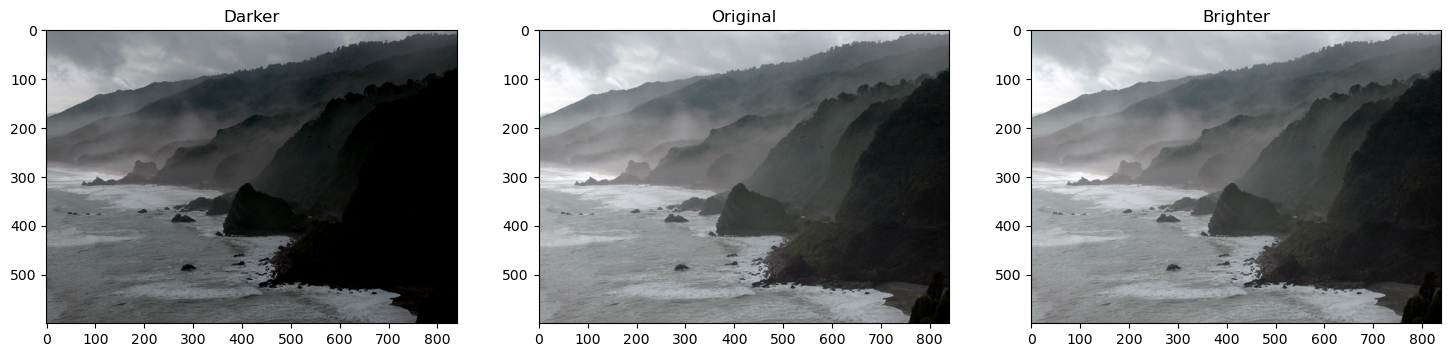

In [22]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker); plt.title("Darker")
plt.subplot(132);plt.imshow(img_rgb);plt.title("Original")
plt.subplot(133);plt.imshow(img_rgb);plt.title("Brighter")
plt.show()

Multiplication or Contrast:

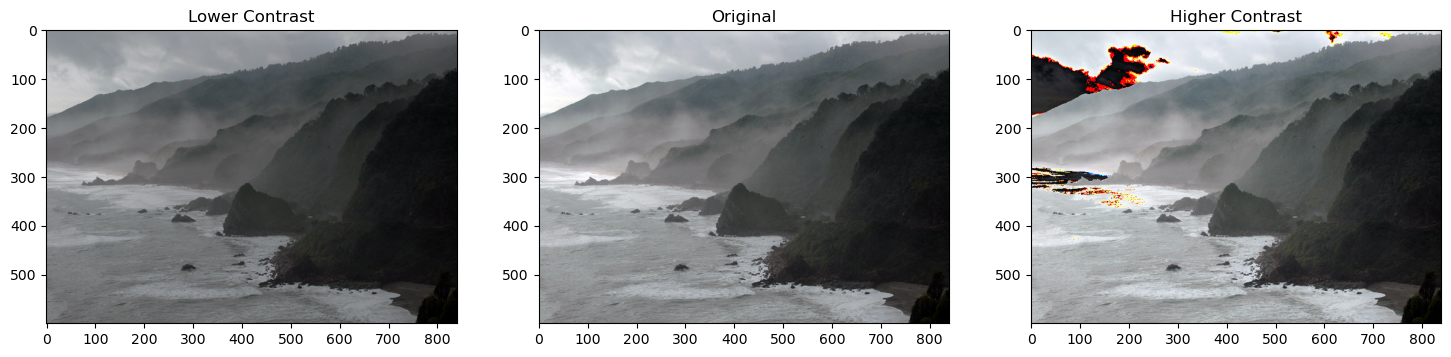

In [23]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb),matrix2))
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast")
plt.show()


There is some overflowing on colors which means the values are being greater than 255.

Handling Overflow using np.clip:

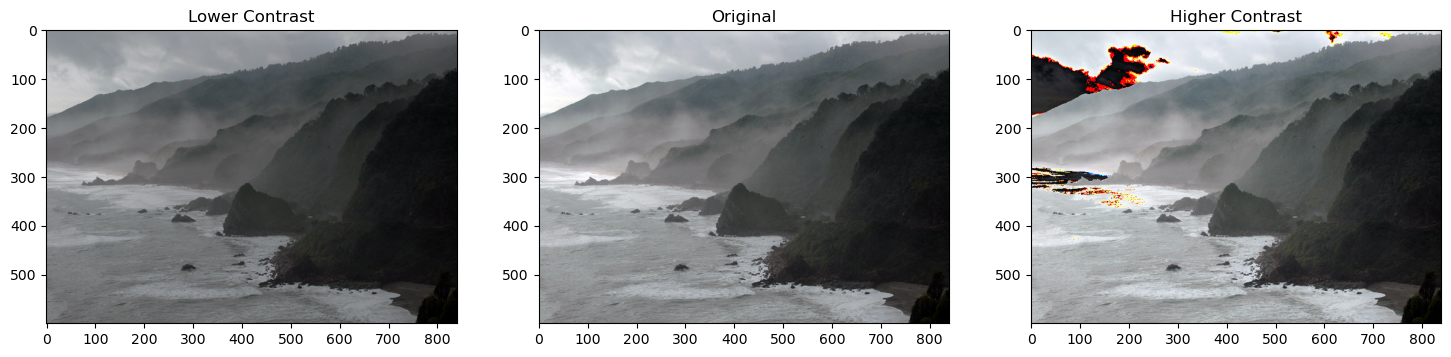

In [25]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast")
plt.show()


Image Thresholding:

Using to create Binary images from grayscale images. One of the most common use cases is that of creating masks from binary images.

retval, dst = cv2.threshold( src, thresh, maxval, type[, dst])
dst: The output array of the same size and type and the same amount of channels as src

src: input array (multiple channel, 8 bit or 32 bit floating point)
thresh: threshold value
maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
type: thresholding type

Adapative Threshold

dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
src: Source 8-bit single-channel image
maxValue: Non-zero value assigned to the pixels for which the condition is satisfied
adaptiveMethod: Adapative Thresholding algorithm to use, The BORDER_REPLICATE|BORDER_ISOLATED is used to process boundaries.
thresholdType: Thresholding type that must be either THRES_BINARY or THRES_BINARY_INV
blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixe: 3,5,7, etc
C: Constant sbutracted from the mean or weighted mean. Normall positive but may be zero or negative as well

(572, 800)


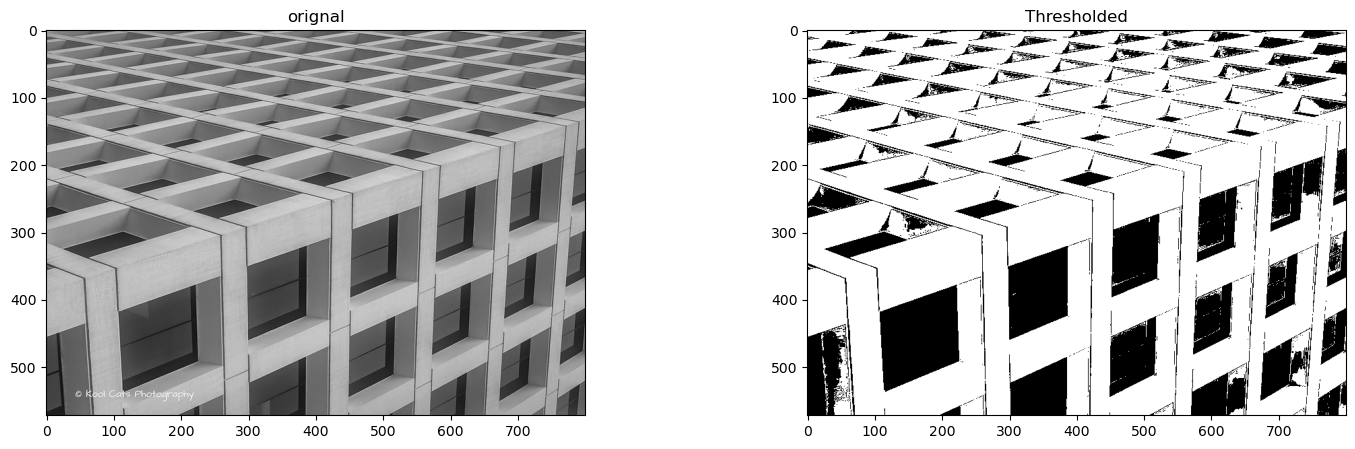

In [26]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)
plt.figure(figsize=[18,5])
plt.subplot(121);plt.imshow(img_read, cmap="gray");plt.title("orignal")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")
print(img_thresh.shape)
plt.show()

Sheet Music Reader:

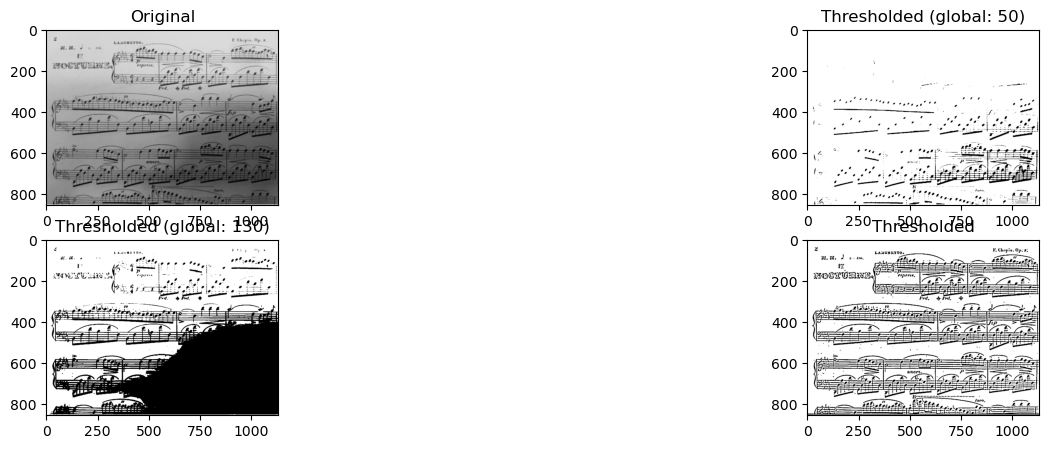

In [27]:
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 7)

plt.figure(figsize=[18,5])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original")
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)")
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)")
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded")
plt.show()

Bitwise Operations:

Example API for cv2.bitwise_and(). 
Other include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]])
dst: Output array that has the same size and type as the input arrays
src1: first input array or a scalar
src2: second input array or scalar

Important*
mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed

(200, 499)


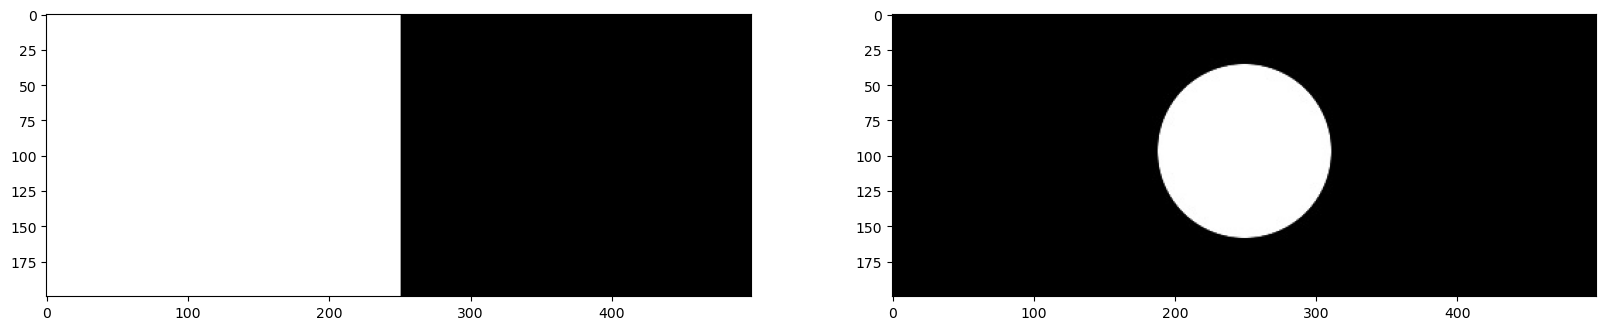

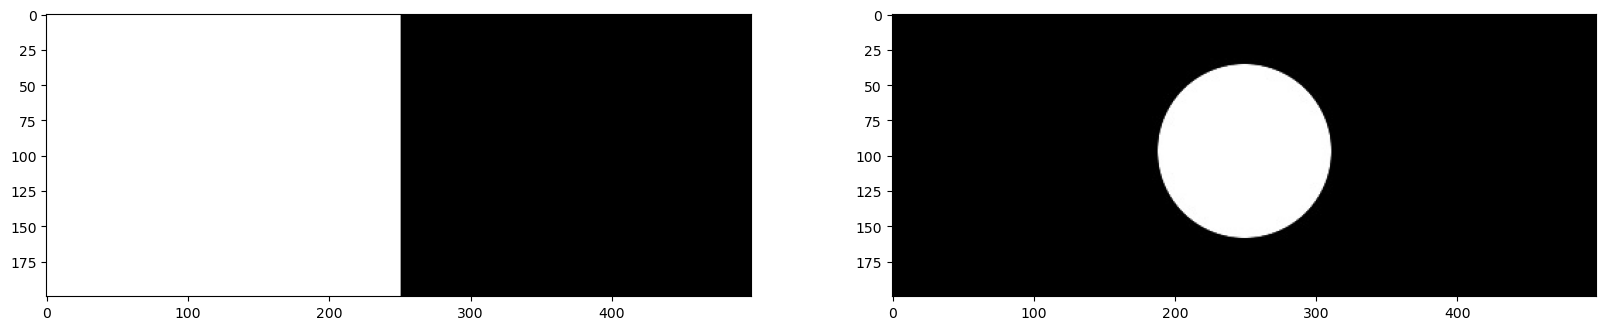

In [29]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)
plt.show()

Bitwise And Operator:

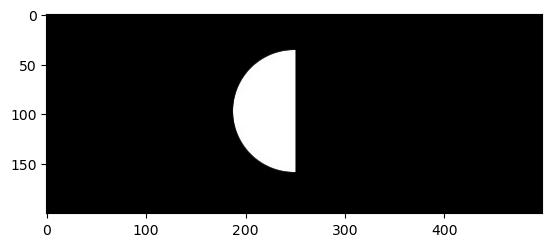

In [30]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")
plt.show()

Bitwise OR Operator:

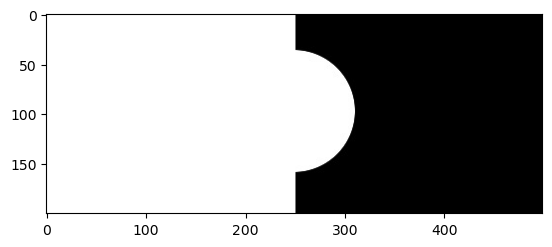

In [31]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")
plt.show()

Bitwise XOR Operator:

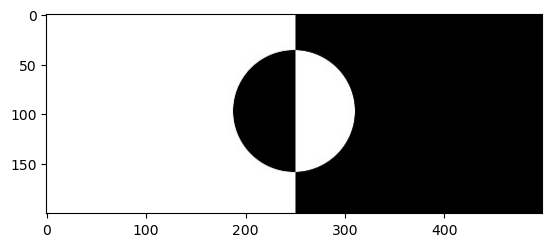

In [32]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")
plt.show()

Logo Manipulation:

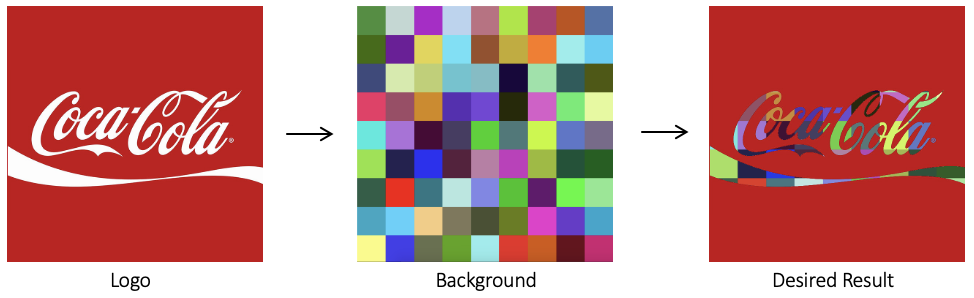

In [33]:
Image(filename='Logo_Manipulation.png')

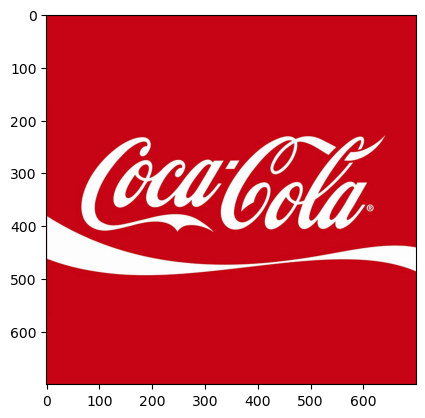

In [35]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


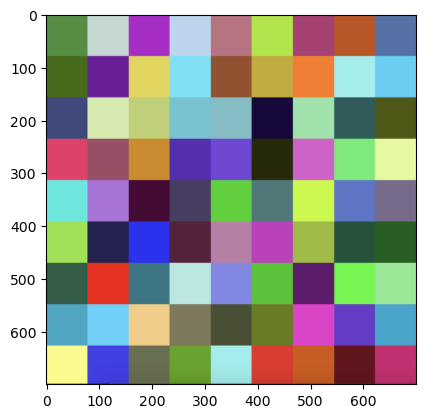

In [36]:
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)
plt.show()


Creating a mask:

(700, 700)


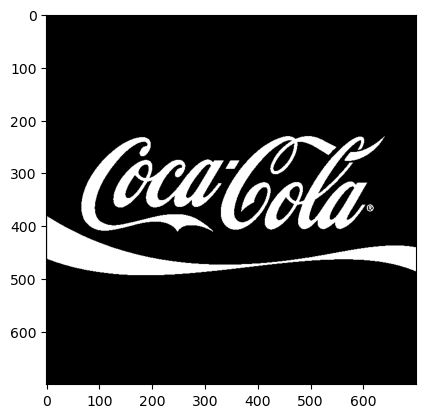

In [37]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)
plt.show()

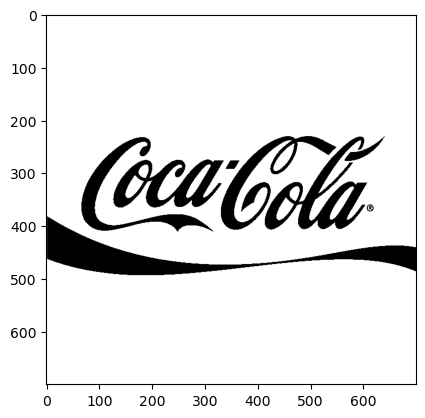

In [38]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")
plt.show()

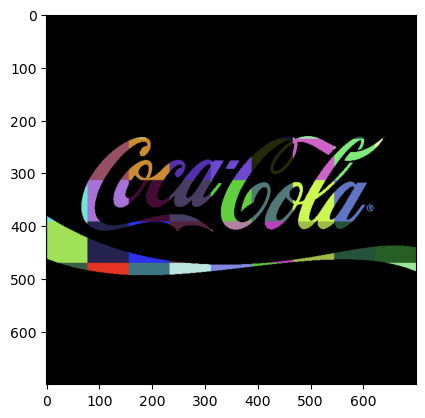

In [40]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)
plt.show()

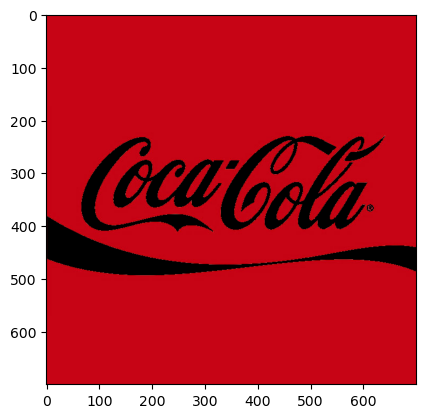

In [41]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask =img_mask_inv)
plt.imshow(img_foreground)
plt.show()

In [43]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])

True

In conclusion:
Thresholding a value of n and max value of 255 then values less than n or equal to n will be set to 0 and everything else will be set to the value 255. 

add_numpy vs add_cv2
add_numpy:
for uint8, any value exeeding 255 wraps around using modulo 256
add_cv2:
opencv clamps values to the range [0, 255]